# [**Régression d'arbre de décision avec AdaBoost**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_adaboost_regression.ipynb)<br/>([*Decision Tree Regression with AdaBoost*](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html))

Un arbre de décision est boosté à l'aide de l'algorithme AdaBoost.R2 [1] sur un jeu de données sinusoïdal 1D avec une petite quantité de bruit gaussien. 299 boosts (300 arbres de décision) sont comparés à un seul régresseur d'arbre de décision. Au fur et à mesure que le nombre de boosts augmente, le régresseur peut s'adapter à plus de détails.

[1] Drucker. [“**Improving Regressors using Boosting Techniques**](https://www.researchgate.net/profile/Harris-Drucker/publication/2424244_Improving_Regressors_Using_Boosting_Techniques/links/0deec51ae736538cec000000/Improving-Regressors-Using-Boosting-Techniques.pdf)[”](https://drive.google.com/file/d/1LpxXmeVx5UR34hPrWnHmFBp_jiNzMar_/view?usp=share_link), 1997.

# Préparation des données

Tout d'abord, nous préparons des données fictives avec une relation sinusoïdale et un peu de bruit gaussien.

In [1]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Entraînement et prédiction avec DecisionTree et AdaBoost Regressors

Maintenant, nous définissons les classifieurs et les ajustons aux données. Ensuite, nous prédisons sur ces mêmes données pour voir dans quelle mesure ils pourraient s'y adapter. Le premier régresseur est un `DecisionTreeRegressor` avec `max_depth=4`. Le deuxième régresseur est un `AdaBoostRegressor` avec un `DecisionTreeRegressor` de `max_depth=4` comme apprenant de base et sera construit avec `n_estimators=300` de ces apprenants de base.

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Tracer les résultats

Enfin, nous traçons dans quelle mesure nos deux régresseurs, le régresseur à arbre de décision unique et le régresseur AdaBoost, pourraient s'adapter aux données.

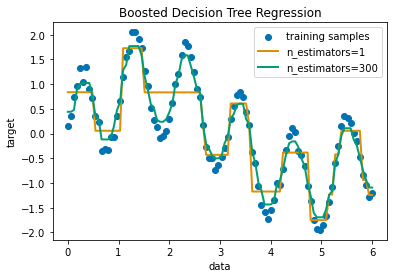

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()